In [2]:
import pandas as pd
import numpy as np
import time
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
import sklearn as sk
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aaronfrederick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
#Load Dataframe
df = pd.read_pickle('master_df.pkl')

In [16]:
df.describe()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,dr_per_mp,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year
count,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,...,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000
mean,23.629998,0.356054,0.126500,0.200737,0.132929,0.314650,0.024915,0.073617,0.068836,0.092926,...,0.125183,0.172712,0.079697,0.030395,0.019744,0.056789,0.106853,0.359609,0.108014,2008.280120
std,12.450294,0.232994,0.214042,0.308157,0.105971,0.235503,0.054057,0.114940,0.130502,0.154885,...,0.114128,0.149351,0.105866,0.113325,0.045364,0.105314,0.143405,0.280821,0.096712,5.618026
min,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,13.870833,0.200000,0.000000,0.000000,0.059754,0.200955,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.074089,0.000000,0.000000,0.000000,0.000000,0.040000,0.179138,0.034642,2003.000000
50%,24.000000,0.400000,0.000000,0.000000,0.126582,0.303638,0.000000,0.040000,0.037037,0.061053,...,0.106793,0.147783,0.057143,0.000000,0.000000,0.041667,0.084181,0.337719,0.097680,2009.000000
75%,34.000000,0.500000,0.250000,0.500000,0.190476,0.414634,0.038462,0.121212,0.107768,0.142857,...,0.177765,0.243367,0.120000,0.047619,0.027829,0.083333,0.138616,0.505145,0.161204,2014.000000
max,54.000000,0.917000,0.857000,0.944000,1.875000,15.000000,1.463415,5.454545,6.315789,6.315789,...,2.000000,2.068966,5.000000,10.000000,1.621622,7.500000,7.500000,6.315789,1.875000,2017.000000


In [17]:
df.corr()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,dr_per_mp,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year
minutes_played,1.000000,0.500780,0.335974,0.391712,0.277134,0.144938,0.078654,0.042705,0.121400,0.109944,...,0.050313,0.010182,0.139785,0.006290,0.003405,-0.011355,-0.216829,0.280717,0.259704,-0.047571
fg_pct,0.500780,1.000000,0.296851,0.208696,0.578436,0.198014,0.181367,0.030153,0.065718,0.060649,...,0.072381,0.067993,0.053221,0.000252,0.025623,-0.014245,-0.112760,0.502012,0.532442,-0.004845
3_pct,0.335974,0.296851,1.000000,0.070129,0.243780,0.150591,0.555158,0.421374,0.013046,-0.011657,...,-0.085063,-0.148353,0.099702,0.012051,-0.109543,-0.010057,-0.106180,0.296915,-0.043183,0.091797
ft_pct,0.391712,0.208696,0.070129,1.000000,0.162937,0.093718,-0.022376,-0.045640,0.328500,0.421418,...,0.068705,0.080573,0.048156,0.007754,0.036366,0.024707,-0.060346,0.271324,0.191044,-0.051149
fg_per_mp,0.277134,0.578436,0.243780,0.162937,1.000000,0.485872,0.418859,0.193459,0.084668,0.081811,...,0.061679,0.087572,0.044485,0.025846,-0.000043,-0.011506,-0.047189,0.874699,0.861622,0.026546
fga_per_mp,0.144938,0.198014,0.150591,0.093718,0.485872,1.000000,0.217105,0.376316,0.045040,0.035795,...,0.009881,0.047200,0.044134,0.021057,-0.021915,-0.000562,-0.061306,0.429422,0.411040,0.023738
fg3_per_mp,0.078654,0.181367,0.555158,-0.022376,0.418859,0.217105,1.000000,0.613082,-0.020783,-0.044832,...,-0.062790,-0.116317,0.057521,-0.003444,-0.081241,-0.020511,-0.074401,0.498960,-0.099984,0.106524
fg3a_per_mp,0.042705,0.030153,0.421374,-0.045640,0.193459,0.376316,0.613082,1.000000,-0.032568,-0.060403,...,-0.089457,-0.154517,0.059020,0.001219,-0.101005,-0.013587,-0.086429,0.248889,-0.130699,0.145523
ft_per_mp,0.121400,0.065718,0.013046,0.328500,0.084668,0.045040,-0.020783,-0.032568,1.000000,0.925848,...,0.031320,0.051403,0.003647,-0.005312,0.017246,0.004752,-0.024906,0.524615,0.104390,-0.029899
fta_per_mp,0.109944,0.060649,-0.011657,0.421418,0.081811,0.035795,-0.044832,-0.060403,0.925848,1.000000,...,0.043328,0.088499,-0.008407,-0.007111,0.026811,0.001556,-0.016607,0.483370,0.114703,-0.037336


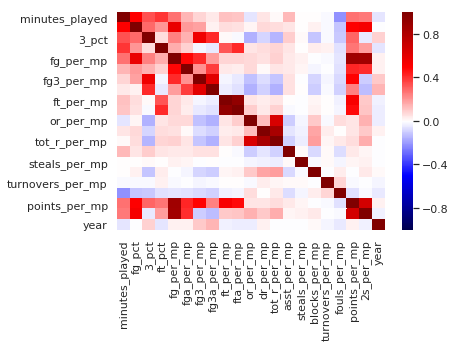

In [18]:
#Heatmap
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic')

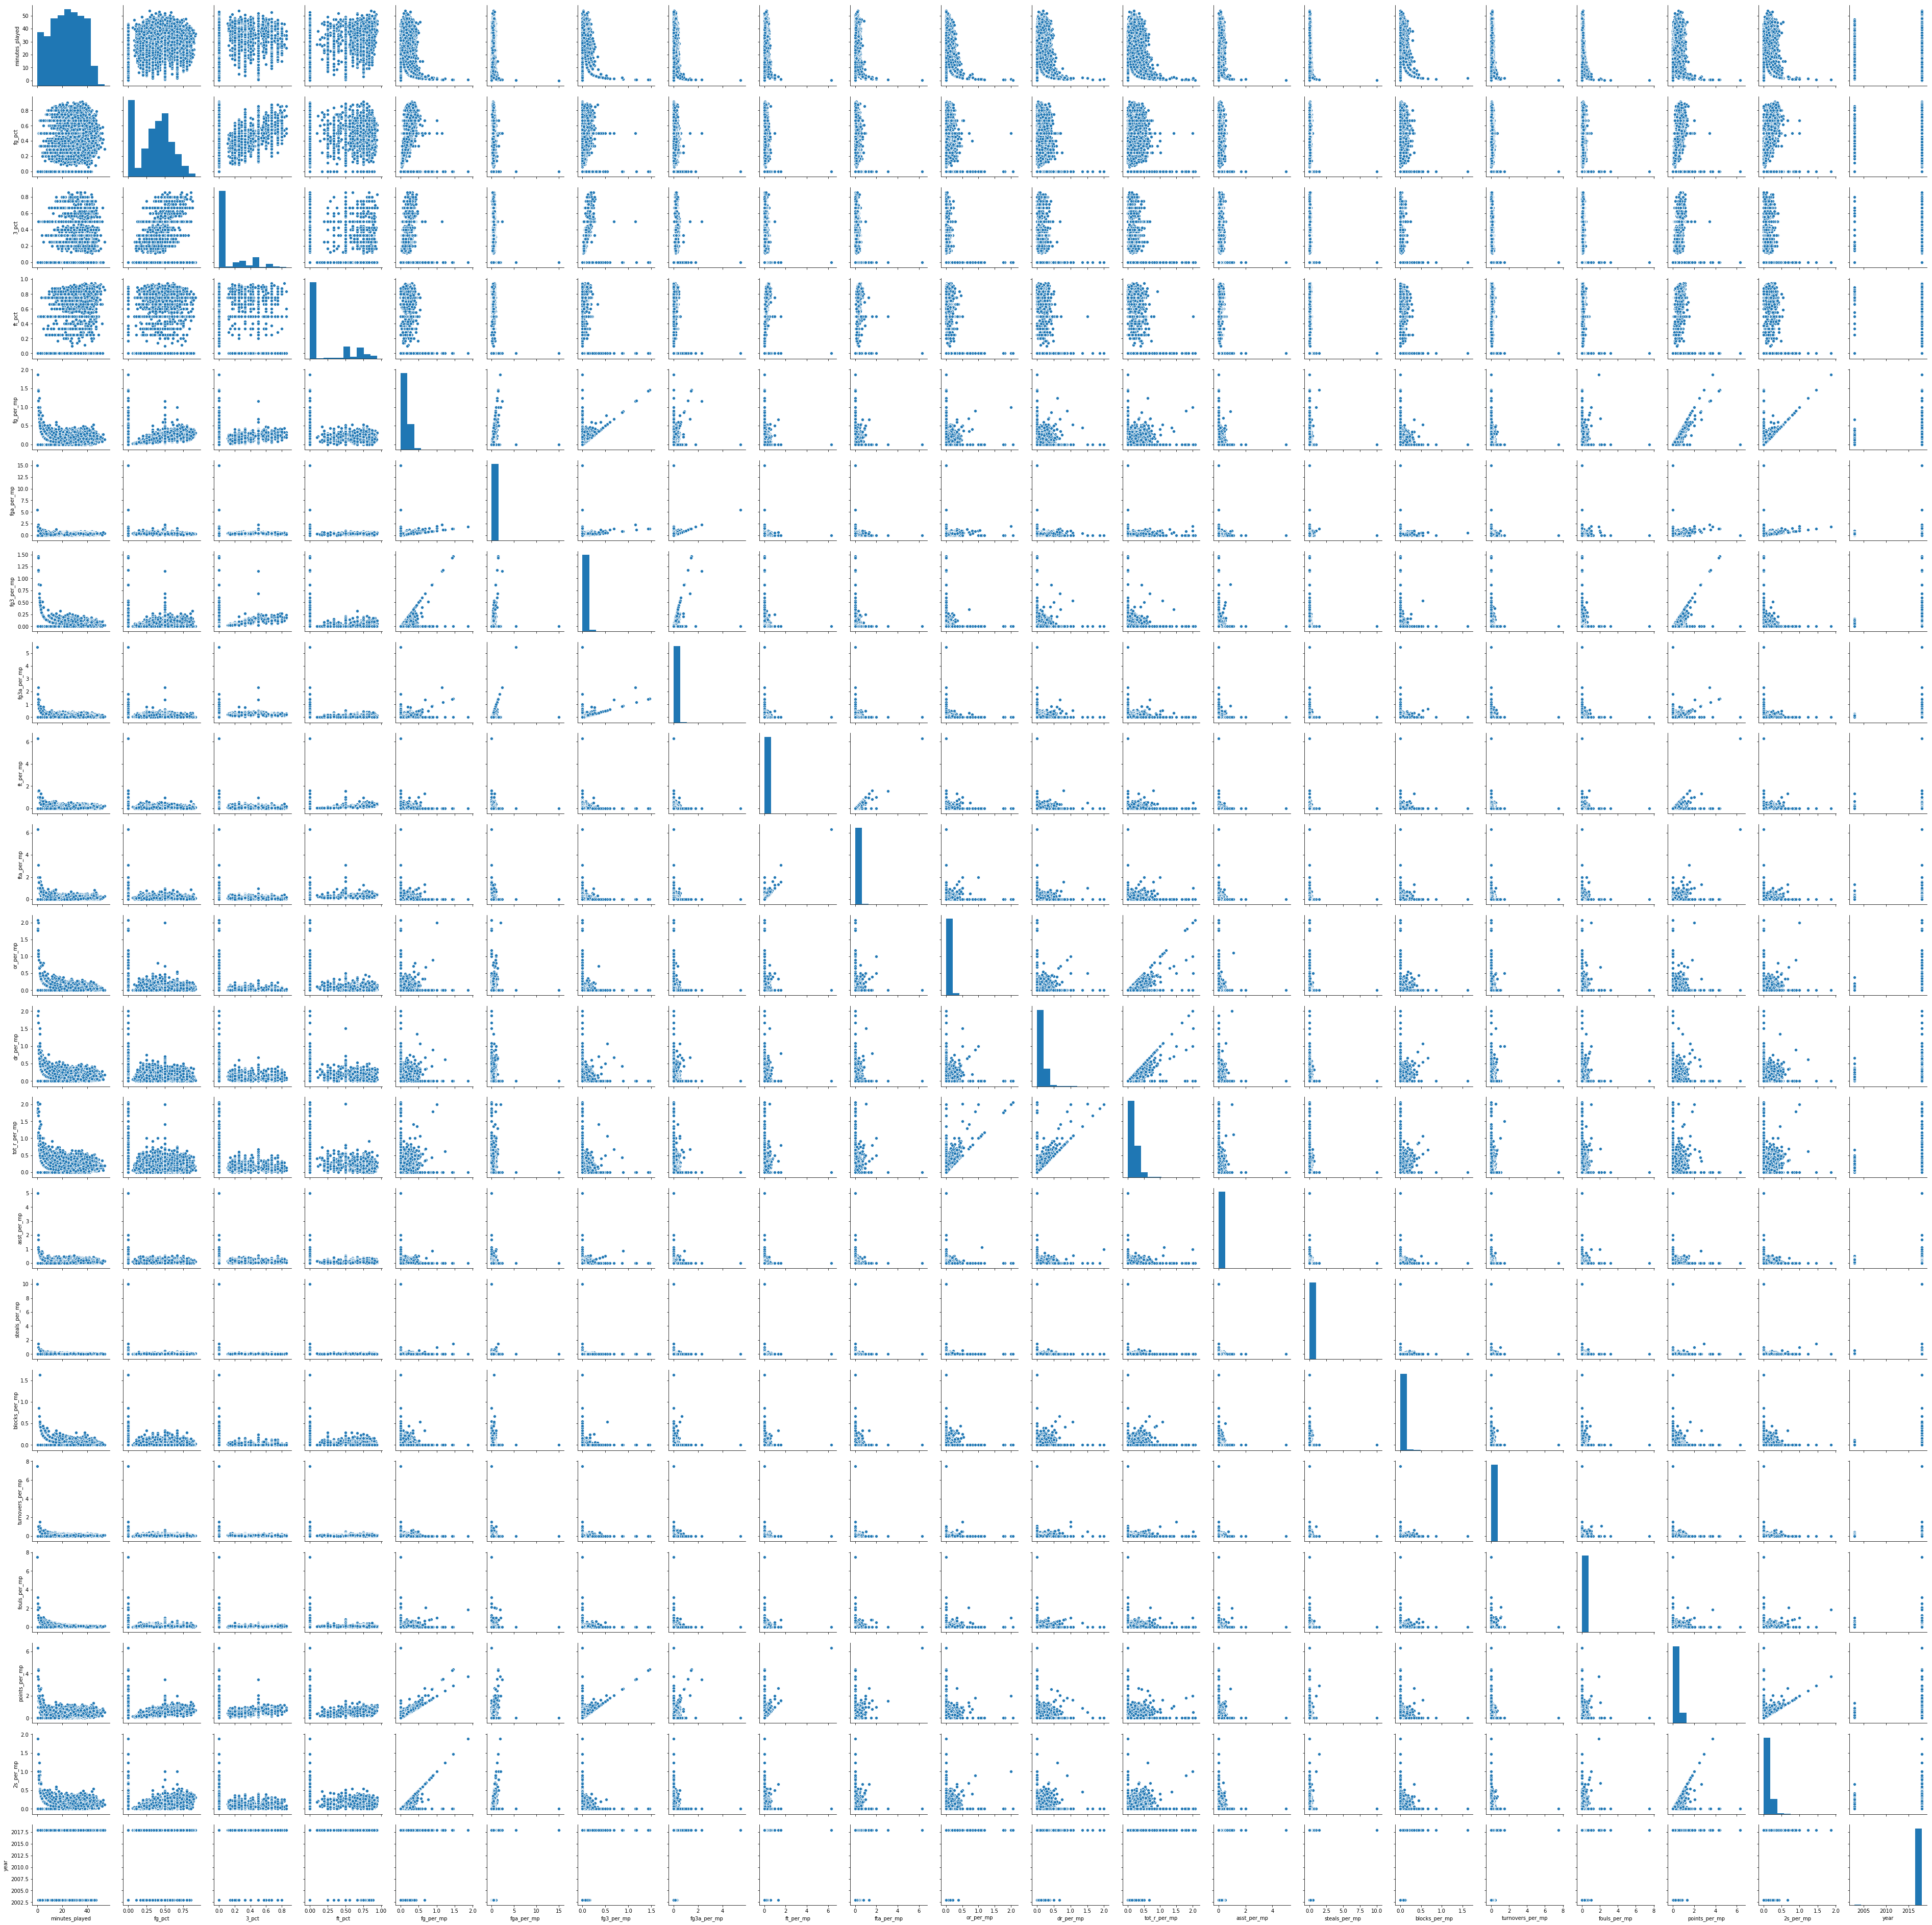

In [6]:
#Pairplot
sns.pairplot(df)

## Modeling with Linear Regression
Because the data doesn't require feature reduction, I will be analyzing this data set with a 70/30 Train/Test split.  

In [7]:
#Splitting Training/Testing Data
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
#Modeling with scikitlearn
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4325641147265078

In [ ]:
#Modeling with statsmodels


Text(0.5, 1.0, 'Model Prediction vs Testing Data')

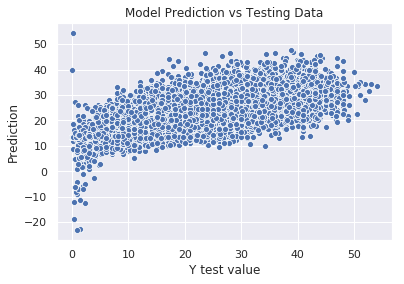

In [9]:
#Visualizing Prediction vs Actual Test Data
sns.set()
sns.scatterplot(y_test, model.predict(X_test))#, label='Linear Regression')
plt.xlabel('Y test value')
plt.ylabel('Prediction')
plt.title('Model Prediction vs Testing Data')

## Looking into playing time vs. salary
Using the analyses prior to discover which aspects of the game lead to most playing time, I'll be pursuing a dollar amount to assign to that improvement.

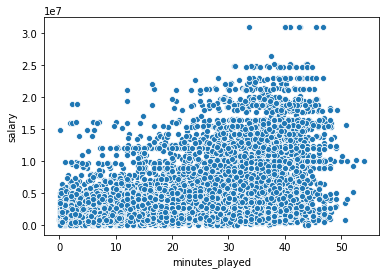

In [6]:
pay_df = pd.read_pickle('merged_df.pkl')
#pay_df
sns.scatterplot(x=pay_df['minutes_played'], y=pay_df['salary'])